# Imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Definitions

In [28]:
t = 1

def epsilon(kx, ky, kz):
    return -2 * t * (np.cos(kx) + np.cos(ky) + np.cos(kz))


def W_k(kx: float, ky: float, kz: float, U: float, n_e: float) -> float:
    
    eps_k = epsilon(kx, ky, kz)
    return np.sqrt(eps_k**2 + U**2 - 2 * U * eps_k * (1 - n_e))


def E_k_pm(kx: float, ky: float, kz: float, mu: float, U: float, n_e: float) -> tuple:


    eps_k = epsilon(kx, ky, kz)
    W = W_k(kx, ky, kz, U, n_e)

    E_plus = 0.5 * (eps_k + U - 2 * mu + W)
    E_minus = 0.5 * (eps_k + U - 2 * mu - W)

    return E_plus, E_minus


def nascent_delta(x, gam: float, func: int) -> float:
    
    if func == 1:
        return gam / (np.pi * (x * x + gam * gam))
    elif func == 2:
        return np.exp(-x * x / (gam * gam)) / (gam * np.sqrt(np.pi))
    else:
        return -1.0

# Compute DOS

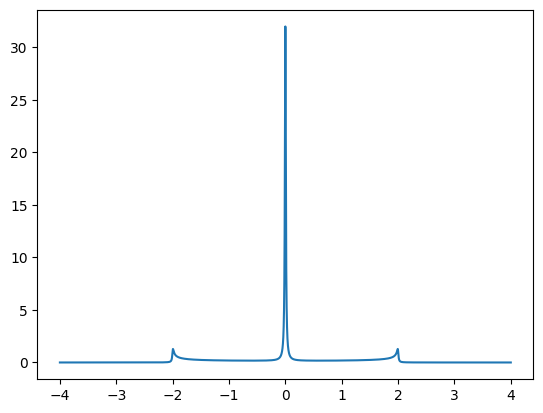

: 

In [ ]:
# Physical Parameters
N = 4000

U = 0
mu = 0
ne = 1


# Plotting Parameters
emin = -4
emax = +4

points = 40000
gam = 0.01


ee = np.linspace(emin, emax, points)
dos = np.zeros_like(ee)
for m in range(0, N):
    # Compute energy for this k
    # ek = epsilon(2 * np.pi * m / N, np.pi/2, np.pi/2)
    ep, em = E_k_pm(2 * np.pi * m / N, np.pi/2, np.pi/2, mu, U, ne)

    # Add a delta at this energy
    # dos += nascent_delta(ee - ep, gam, 1) / N
    dos += nascent_delta(ee - ep, gam, 1) / N
    dos += nascent_delta(ee - em, gam, 1) / N


plt.plot(ee, dos)